In [2]:
import pandas as pd
import numpy as np
import pybaseball
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, classification_report, accuracy_score, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from pybaseball import statcast
from pybaseball import playerid_lookup, statcast_pitcher

This is a large query, it may take a moment to complete


  0%|          | 0/10 [00:00<?, ?it/s]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 10%|█         | 1/10 [00:10<01:33, 10.43s/it]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 20%|██        | 2/10 [00:16<01:01,  7.67s/it]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is de

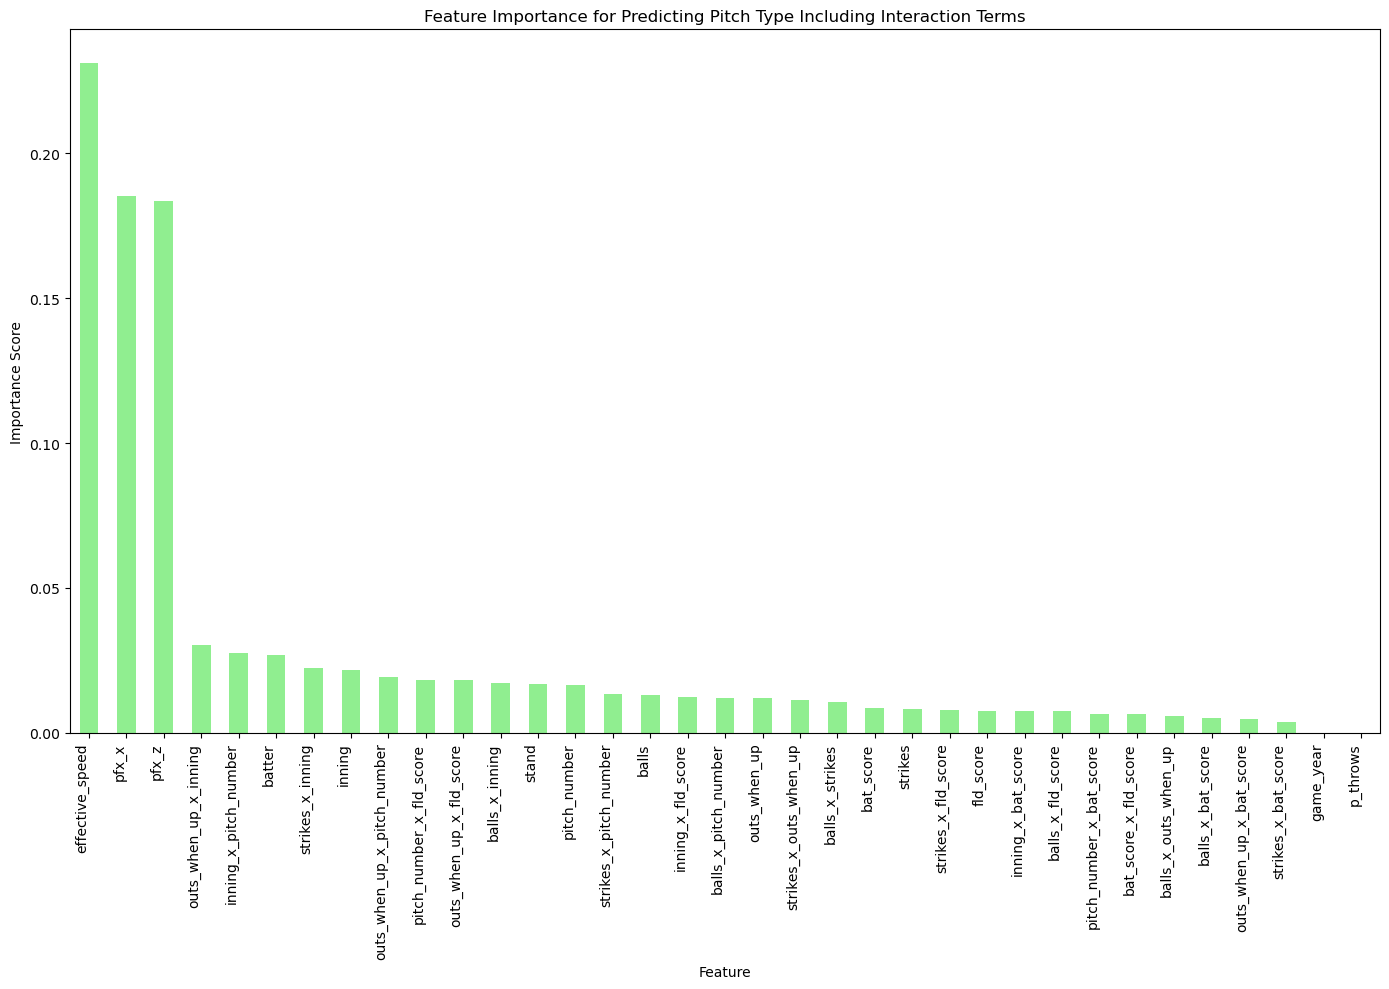

In [10]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from pybaseball import statcast

# Load and filter data
start_date = '2023-04-01'
end_date = '2023-04-10'
data_pitch_speed = statcast(start_dt=start_date, end_dt=end_date)
selected_columns = [
    'pitch_type', 'stand', 'p_throws', 
    'balls', 'strikes', 'game_year', 'outs_when_up', 'inning', 
    'pitch_number', 'bat_score', 'effective_speed', 'pfx_x',
    'pfx_z', 'batter', 'pitcher',
    'fld_score'
]
filtered_data = data_pitch_speed[selected_columns]
effective_speed_data = filtered_data[filtered_data['pitcher'] == 640455]

# Encode categorical features
le_stand = LabelEncoder()
le_p_throws = LabelEncoder()
effective_speed_data['stand'] = le_stand.fit_transform(effective_speed_data['stand'].astype(str))
effective_speed_data['p_throws'] = le_p_throws.fit_transform(effective_speed_data['p_throws'].astype(str))

# Split data into training and test sets
X = effective_speed_data.drop(columns=['pitch_type', 'pitcher'])
y = effective_speed_data['pitch_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode pitch_type on training and test data
ohe = OneHotEncoder(sparse_output=False)
pitch_type_ohe_train = ohe.fit_transform(y_train.values.reshape(-1, 1))
pitch_type_ohe_test = ohe.transform(y_test.values.reshape(-1, 1))
y_train = pd.DataFrame(pitch_type_ohe_train, columns=ohe.get_feature_names_out(['pitch_type']))
y_test = pd.DataFrame(pitch_type_ohe_test, columns=ohe.get_feature_names_out(['pitch_type']))

# Generate interaction features for training and test data
interaction_features = ['balls', 'strikes', 'outs_when_up', 'inning', 'pitch_number', 'bat_score', 'fld_score']
for feature1, feature2 in itertools.combinations(interaction_features, 2):
    interaction_term = f"{feature1}_x_{feature2}"
    X_train[interaction_term] = X_train[feature1] * X_train[feature2]
    X_test[interaction_term] = X_test[feature1] * X_test[feature2]

# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotting the importance of all features
plt.figure(figsize=(14, 10))
feature_importances.plot(kind='bar', color='lightgreen')
plt.title('Feature Importance for Predicting Pitch Type Including Interaction Terms')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [3]:
start_date = '2023-04-01'
end_date = '2023-04-10'
data_pitch_speed = statcast(start_dt=start_date, end_dt=end_date)
selected_columns = [
    'pitch_type', 'stand', 'p_throws', 
    'balls', 'strikes', 'game_year', 'outs_when_up', 'inning', 
    'pitch_number', 'bat_score', 'effective_speed', 'pfx_x',
    'pfx_z', 'batter', 'pitcher',
    'fld_score'
]
filtered_data = data_pitch_speed[selected_columns]
effective_speed_data = filtered_data[filtered_data['pitcher'] == 640455]

This is a large query, it may take a moment to complete


  0%|          | 0/10 [00:00<?, ?it/s]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 10%|█         | 1/10 [00:11<01:40, 11.14s/it]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 20%|██        | 2/10 [00:14<00:53,  6.65s/it]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is de

In [7]:
le_stand = LabelEncoder()
le_p_throws = LabelEncoder()

effective_speed_data['stand'] = le_stand.fit_transform(effective_speed_data['stand'].astype(str))
effective_speed_data['p_throws'] = le_p_throws.fit_transform(effective_speed_data['p_throws'].astype(str))
ohe = OneHotEncoder(sparse_output=False)
pitch_type_ohe = ohe.fit_transform(effective_speed_data[['pitch_type']])
pitch_type_ohe_df = pd.DataFrame(pitch_type_ohe, columns=ohe.get_feature_names_out(['pitch_type']))

effective_speed_data = pd.concat([effective_speed_data.reset_index(drop=True), pitch_type_ohe_df], axis=1)


/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_11307/734469783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['stand'] = le_stand.fit_transform(effective_speed_data['stand'].astype(str))
/var/folders/bc/69frl30s4xv269mkcmjkv2qr0000gn/T/ipykernel_11307/734469783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  effective_speed_data['p_throws'] = le_p_throws.fit_transform(effective_speed_data['p_throws'].astype(str))


NameError: name 'feature_importances' is not defined

<Figure size 1400x1000 with 0 Axes>

This is a large query, it may take a moment to complete


  0%|          | 0/10 [00:00<?, ?it/s]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 10%|█         | 1/10 [00:00<00:06,  1.41it/s]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 20%|██        | 2/10 [00:01<00:03,  2.05it/s]/opt/anaconda3/envs/learn-env/lib/python3.12/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is de

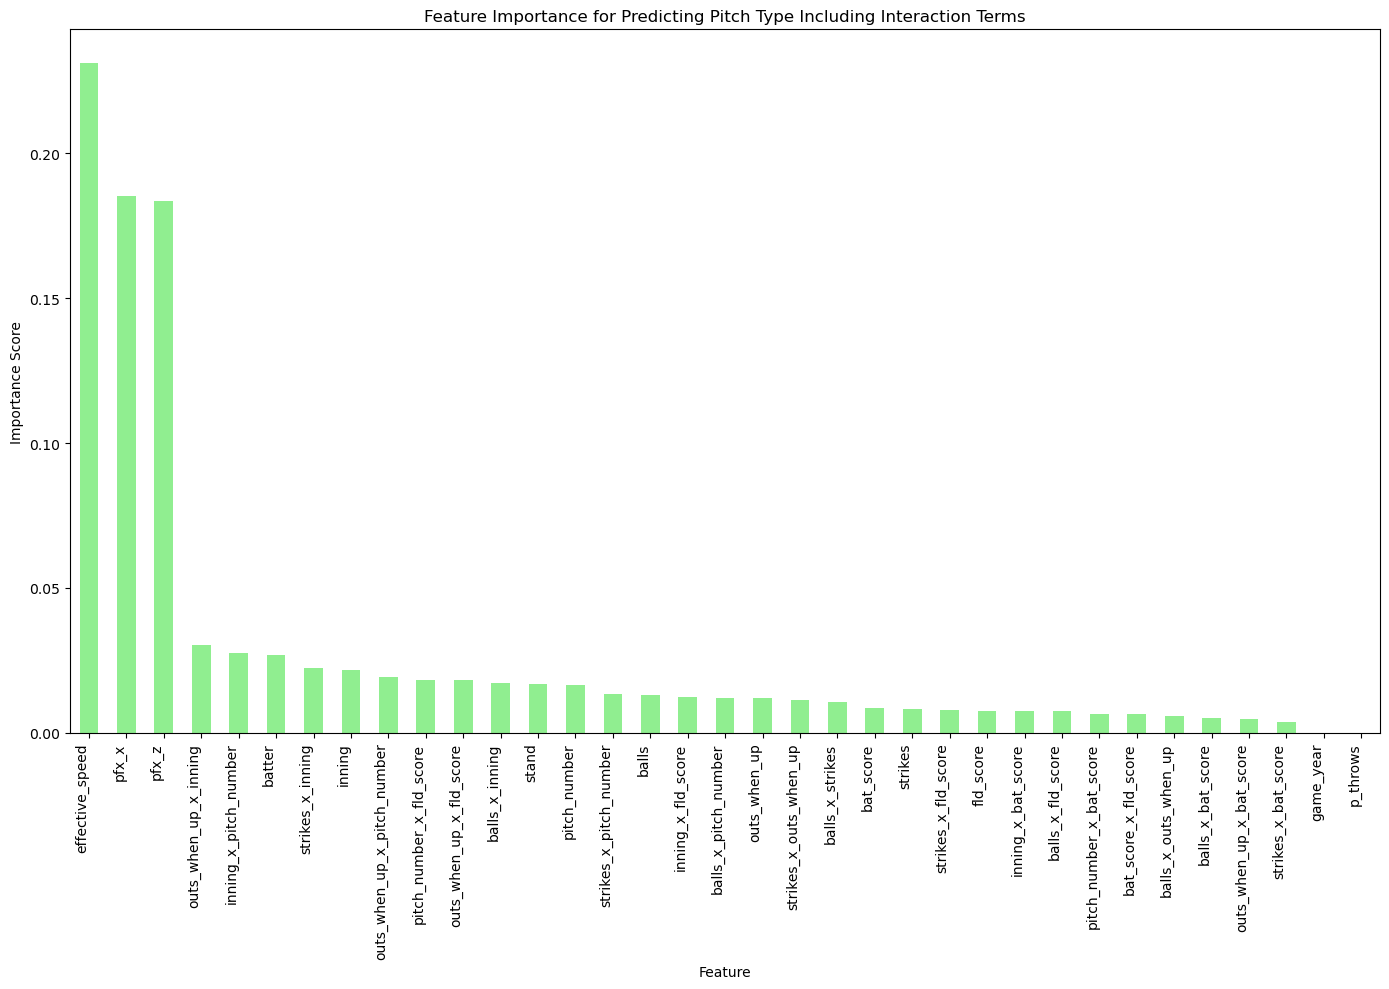

ValueError: Mix of label input types (string and number)

In [11]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from pybaseball import statcast

# Load and filter data
start_date = '2023-04-01'
end_date = '2023-04-10'
data_pitch_speed = statcast(start_dt=start_date, end_dt=end_date)
selected_columns = [
    'pitch_type', 'stand', 'p_throws', 
    'balls', 'strikes', 'game_year', 'outs_when_up', 'inning', 
    'pitch_number', 'bat_score', 'effective_speed', 'pfx_x',
    'pfx_z', 'batter', 'pitcher',
    'fld_score'
]
filtered_data = data_pitch_speed[selected_columns]
effective_speed_data = filtered_data[filtered_data['pitcher'] == 640455]

# Encode categorical features
le_stand = LabelEncoder()
le_p_throws = LabelEncoder()
effective_speed_data['stand'] = le_stand.fit_transform(effective_speed_data['stand'].astype(str))
effective_speed_data['p_throws'] = le_p_throws.fit_transform(effective_speed_data['p_throws'].astype(str))

# Split data into training and test sets
X = effective_speed_data.drop(columns=['pitch_type', 'pitcher'])
y = effective_speed_data['pitch_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode pitch_type on training and test data
ohe = OneHotEncoder(sparse_output=False)
pitch_type_ohe_train = ohe.fit_transform(y_train.values.reshape(-1, 1))
pitch_type_ohe_test = ohe.transform(y_test.values.reshape(-1, 1))
y_train = pd.DataFrame(pitch_type_ohe_train, columns=ohe.get_feature_names_out(['pitch_type']))
y_test = pd.DataFrame(pitch_type_ohe_test, columns=ohe.get_feature_names_out(['pitch_type']))

# Generate interaction features for training and test data
interaction_features = ['balls', 'strikes', 'outs_when_up', 'inning', 'pitch_number', 'bat_score', 'fld_score']
for feature1, feature2 in itertools.combinations(interaction_features, 2):
    interaction_term = f"{feature1}_x_{feature2}"
    X_train[interaction_term] = X_train[feature1] * X_train[feature2]
    X_test[interaction_term] = X_test[feature1] * X_test[feature2]

# Train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plotting the importance of all features
plt.figure(figsize=(14, 10))
feature_importances.plot(kind='bar', color='lightgreen')
plt.title('Feature Importance for Predicting Pitch Type Including Interaction Terms')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test.idxmax(axis=1), pd.DataFrame(y_test_pred).idxmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Pitch Type Prediction')
plt.tight_layout()
plt.show()
